In [1]:
filename='sensor2_ben.csv'

In [13]:
import pandas as pd

In [39]:
df=pd.read_csv(filename,skiprows=1,parse_dates=['Date Time, GMT+00:00'])

In [40]:
df

,#,"Date Time, GMT+00:00","Temp, °F (LGR S/N: 10456880, SEN S/N: 10456880)",Host Connected (LGR S/N: 10456880),Coupler Attached (LGR S/N: 10456880),Stopped (LGR S/N: 10456880),End Of File (LGR S/N: 10456880)
0,1,2014-02-25 07:00:00,68.077,NaN,NaN,NaN,NaN
1,2,2014-02-25 07:30:00,67.906,NaN,NaN,NaN,NaN
2,3,2014-02-25 08:00:00,67.906,NaN,NaN,NaN,NaN
3,4,2014-02-25 08:30:00,68.077,NaN,NaN,NaN,NaN
4,5,2014-02-25 09:00:00,68.421,NaN,NaN,NaN,NaN
5,6,2014-02-25 09:30:00,68.934,NaN,NaN,NaN,NaN
6,7,2014-02-25 10:00:00,69.449,NaN,NaN,NaN,NaN
7,8,2014-02-25 10:30:00,69.964,NaN,NaN,NaN,NaN
8,9,2014-02-25 11:00:00,70.651,NaN,NaN,NaN,NaN
9,10,2014-02-25 11:30:00,71.168,NaN,NaN,NaN,NaN


In [46]:
df1=df[['Date Time, GMT+00:00','Temp, °F (LGR S/N: 10456880, SEN S/N: 10456880)']].copy()
df1=df1.rename(columns={'Date Time, GMT+00:00':'DateTime',
                        'Temp, °F (LGR S/N: 10456880, SEN S/N: 10456880)':'Temp'})
df1['Temp']=(df1['Temp']-32)*5/9
df1=df1.set_index('DateTime')
df1.to_csv('NewTable.csv')
df1.head()

,Temp
DateTime,
2014-02-25 07:00:00,20.042778
2014-02-25 07:30:00,19.947778
2014-02-25 08:00:00,19.947778
2014-02-25 08:30:00,20.042778
2014-02-25 09:00:00,20.233889


In [49]:
df1.resample('1m').max()

,Temp
DateTime,
2014-02-28,22.717222
2014-03-31,23.772778
2014-04-30,20.423889
2014-05-31,25.318889
2014-06-30,29.152222


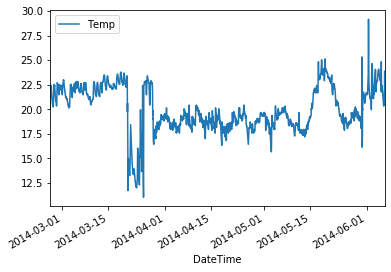

In [51]:
%matplotlib inline
df1.plot()

PLOT_FILENAME: test.png


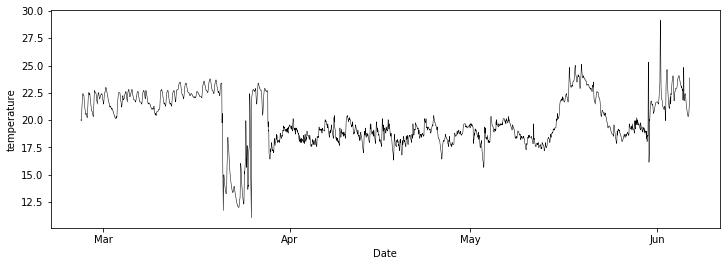

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig, ax = plt.subplots(1,figsize=(12,4))
ax.plot(df1,color='black',linewidth=0.5)
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel('temperature')
plot_filename=r'test.png'
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()